<a href="https://colab.research.google.com/github/denmj/ML_regs/blob/master/Assignment_2_Pokemon_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

#changing default values for parameters individually
pyplot.rcParams['lines.markersize'] = 20
pyplot.rcParams['font.size'] = '15.0'

# Set the interactive mode to ON
plt.ion()


In [6]:
data_set_path = "/content/pokemon_data.csv"
data_set = pd.read_csv(data_set_path)



In [7]:
data_set['Type'].isnull().values.any()

False

In [8]:
data_set['type_freq'] = data_set.groupby(['Type'])['Type'].transform('count')

In [9]:
data_set['gen_freq']  = data_set.groupby(['generation'])['generation'].transform('count')

In [10]:
data_set

,Name,Type,generation,is_legendary,type_freq,gen_freq
0,Bulbasaur,grass,1,0,78,151
1,Ivysaur,grass,1,0,78,151
2,Venusaur,grass,1,0,78,151
3,Charmander,fire,1,0,52,151
4,Charmeleon,fire,1,0,52,151
...,...,...,...,...,...,...
796,Celesteela,steel,7,1,24,80
797,Kartana,grass,7,1,78,80
798,Guzzlord,dark,7,1,29,80
799,Necrozma,psychic,7,1,53,80


In [11]:
type_slice = data_set[['Type', 'type_freq']].sort_values(by='type_freq', ascending=False).drop_duplicates()
gen_freq  = data_set[['generation', 'gen_freq']].sort_values(by='gen_freq', ascending=False).drop_duplicates()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

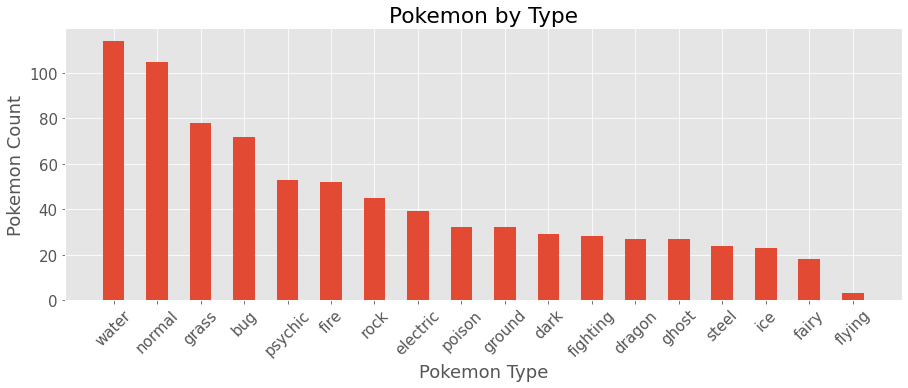

In [12]:
width = 0.5
plt.bar(type_slice['Type'], type_slice['type_freq'], width);
# Add labels and title
plt.title("Pokemon by Type")
plt.xlabel("Pokemon Type")
plt.ylabel("Pokemon Count")
plt.xticks(rotation=45)  



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

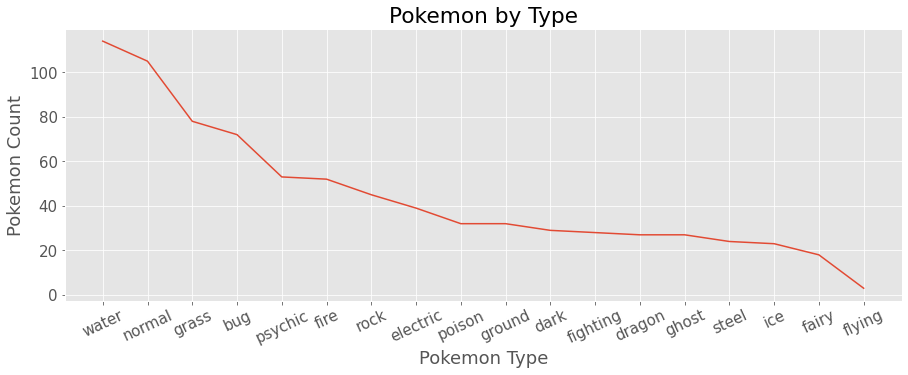

In [13]:
plt.plot(type_slice['Type'], type_slice['type_freq']);

# Add labels and title
plt.title("Pokemon by Type")
plt.xlabel("Pokemon Type")
plt.ylabel("Pokemon Count")
plt.xticks(rotation=25)  


Text(0, 0.5, 'Pokemon Count')

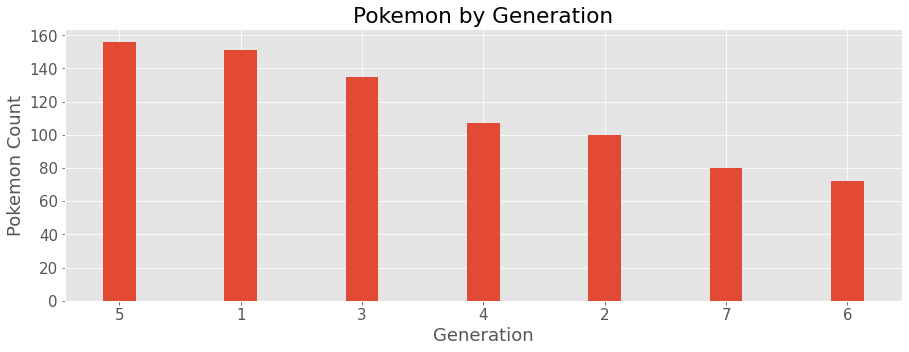

In [14]:
# Cast 'generation' col to string so bar plot wont order it numerically 
width = 0.27
plt.bar(gen_freq['generation'].astype('str'), gen_freq['gen_freq'], width);

# Add labels and title
plt.title("Pokemon by Generation")
plt.xlabel("Generation")
plt.ylabel("Pokemon Count")

In [15]:
data_set['leg_gen_pok_freq']  =   data_set.groupby(['generation', 'is_legendary'])[ 'generation'].transform('count')

In [18]:
z = data_set[['generation', 'is_legendary', 'leg_gen_pok_freq', 'gen_freq']].drop_duplicates()
z = z.sort_values(by='gen_freq')


Text(0, 0.5, 'Pokemon Count')

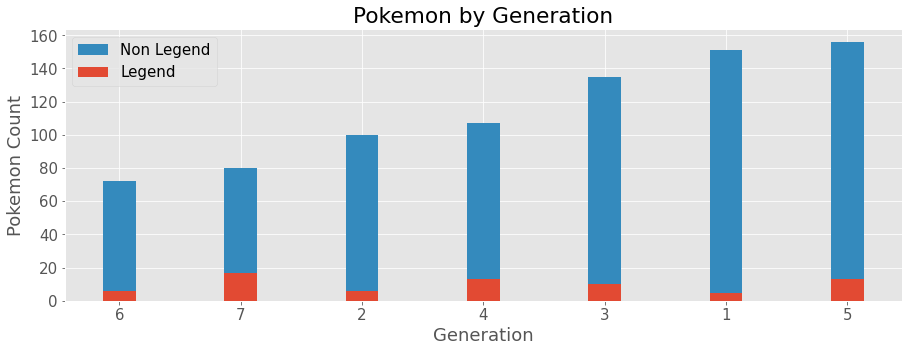

In [20]:
# Cast 'generation' col to string so bar plot wont order it numerically 
width = 0.27
inx =  np.arange(len(z['generation'].unique()))
plot_1 = plt.bar(z['generation'].unique().astype('str'), z[z['is_legendary'] == 1]['leg_gen_pok_freq'], width);
plot_2 = plt.bar(z['generation'].unique().astype('str'),  z[z['is_legendary'] == 0]['leg_gen_pok_freq'], width,
        bottom=z[z['is_legendary'] == 1]['leg_gen_pok_freq']);

# Add labels and title
plt.legend( (plot_2[0],plot_1[0]), ('Non Legend', 'Legend'))

plt.title("Pokemon by Generation")
plt.xlabel("Generation")
plt.ylabel("Pokemon Count")

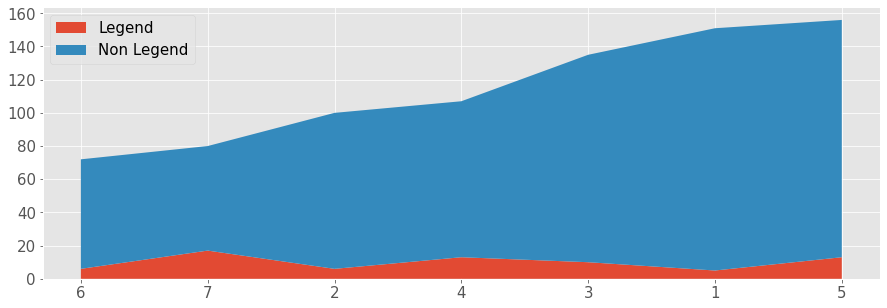

In [26]:
l = ["Legend", "Non Legend"]
fig, ax = plt.subplots()
ax.stackplot(z['generation'].unique().astype('str'),
             z[z['is_legendary'] == 1]['leg_gen_pok_freq'],
             z[z['is_legendary'] == 0]['leg_gen_pok_freq'], labels=l)
ax.legend(loc=2)


In [28]:
z['generation'].unique()

array([6, 7, 2, 4, 3, 1, 5])

Text(0, 0.5, 'Generation')

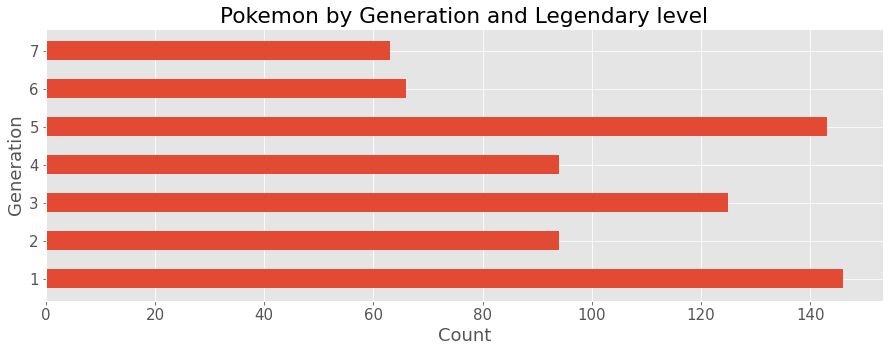

In [30]:
fig, ax = plt.subplots()
# Cast 'generation' col to string so bar plot wont order it numerically 
width = 0.5
inx =  np.arange(len(z['generation'].unique()))
ax.barh(z['generation'], z['leg_gen_pok_freq'], width);
# ax.bar(legends['generation'], pesants['leg_gen_pok_freq'], width, bottom=legends['leg_gen_pok_freq']);


# Add labels and title
plt.title("Pokemon by Generation and Legendary level")
plt.xlabel("Count")
plt.ylabel("Generation")

In [31]:
data_set

,Name,Type,generation,is_legendary,type_freq,gen_freq,leg_gen_pok_freq
0,Bulbasaur,grass,1,0,78,151,146
1,Ivysaur,grass,1,0,78,151,146
2,Venusaur,grass,1,0,78,151,146
3,Charmander,fire,1,0,52,151,146
4,Charmeleon,fire,1,0,52,151,146
...,...,...,...,...,...,...,...
796,Celesteela,steel,7,1,24,80,17
797,Kartana,grass,7,1,78,80,17
798,Guzzlord,dark,7,1,29,80,17
799,Necrozma,psychic,7,1,53,80,17


In [32]:
legendary_pok = data_set['is_legendary'] == 1
grass_pok = data_set['Type'] == 'grass'
data_set[ legendary_pok & grass_pok]

,Name,Type,generation,is_legendary,type_freq,gen_freq,leg_gen_pok_freq
491,Shaymin,grass,4,1,78,107,13
639,Virizion,grass,5,1,78,156,13
786,Tapu Bulu,grass,7,1,78,80,17
797,Kartana,grass,7,1,78,80,17


In [ ]:
# as list 
data_set['Name'].values

Text(0, 0.5, 'Count')

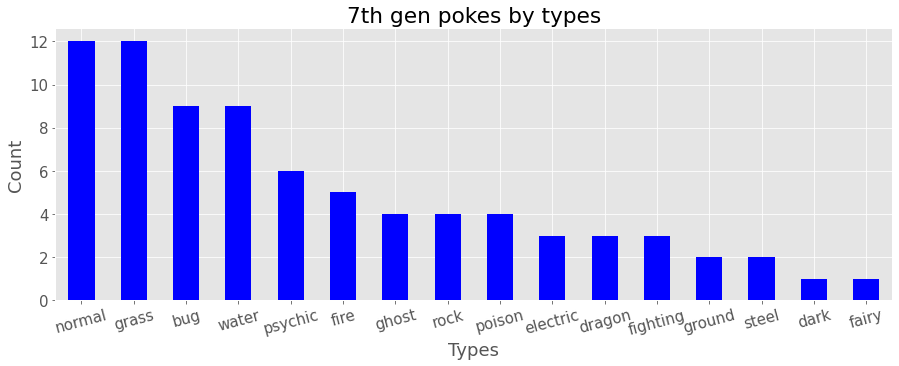

In [84]:
# Which type of pokemons has most gen 7 pokes? 
is_gen_seven = data_set['generation'] == 7
gen_seven_pokes =  data_set[is_gen_seven]
gen_seven_values = gen_seven_pokes['Type'].value_counts()
gen_seven_values.plot(kind='bar', rot=15, color='b')
plt.title("7th gen pokes by types")
plt.xlabel("Types")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

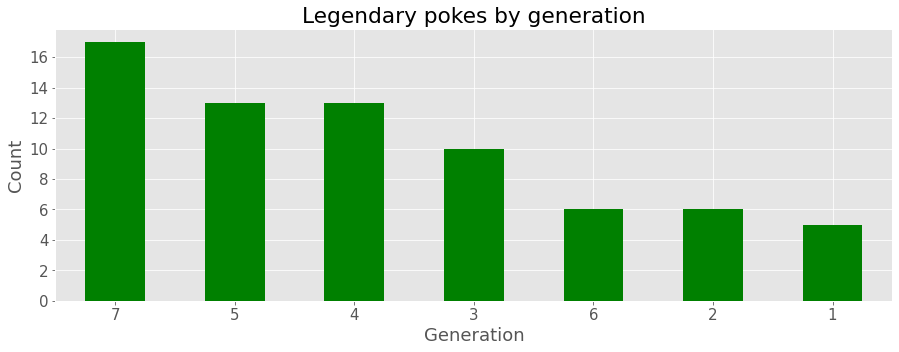

In [97]:
# Which poke gen has most legendary pokemons ? 
is_legendary = data_set['is_legendary'] == 1
legendary_pokes = data_set[is_legendary]
legendary_pokes['generation'].value_counts().plot(kind='bar' , rot = 0, color='g')
plt.title("Legendary pokes by generation")
plt.xlabel("Generation")
plt.ylabel("Count")


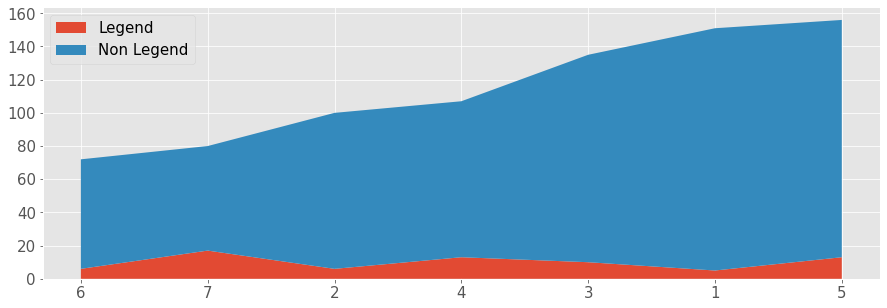

In [204]:
l = ["Legend", "Non Legend"]
fig, ax = plt.subplots()

ax.stackplot(z['generation'].unique().astype('str'),
             [z[z['is_legendary'] == 1]['leg_gen_pok_freq'],
             z[z['is_legendary'] == 0]['leg_gen_pok_freq']], labels=l)
ax.legend(loc=2)

In [205]:
data_set

,Name,Type,generation,is_legendary,type_freq,gen_freq,leg_gen_pok_freq,gen_seven_by_type
0,Bulbasaur,grass,1,0,78,151,146,NaN
1,Ivysaur,grass,1,0,78,151,146,NaN
2,Venusaur,grass,1,0,78,151,146,NaN
3,Charmander,fire,1,0,52,151,146,NaN
4,Charmeleon,fire,1,0,52,151,146,NaN
...,...,...,...,...,...,...,...,...
796,Celesteela,steel,7,1,24,80,17,NaN
797,Kartana,grass,7,1,78,80,17,NaN
798,Guzzlord,dark,7,1,29,80,17,NaN
799,Necrozma,psychic,7,1,53,80,17,NaN


In [178]:
ir= pd.read_csv('//content//Iris.csv')

In [179]:
ir

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [174]:
ir['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [180]:
# Change Y to categorical
ir['Species'] = ir['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}) 

In [182]:
ir

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


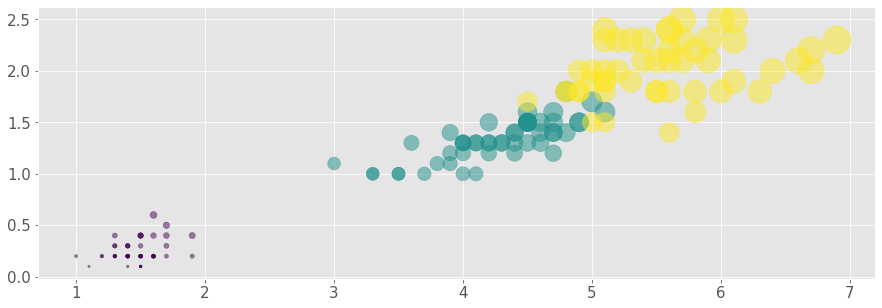

In [196]:
plt.scatter(ir.PetalLengthCm, ir.PetalWidthCm,
            s=50*ir.PetalLengthCm*ir.PetalWidthCm, c=ir.Species, alpha=0.5)

In [ ]:
p = []

In [ ]:
data_set['fr'].unique()

array([ 78,  52, 114,  72, 105,  32,  39,  18,  28,  53,  45,  27,  23,
        29,  24,   3])

# Q-1 
### Is the airline making the right decisions to increase their number of passengers every year?

# Answer 
### Well passangers are increasing year by year accoring to graph below, so I would assume they are doing right decision that demonstrated by passenger growth. 


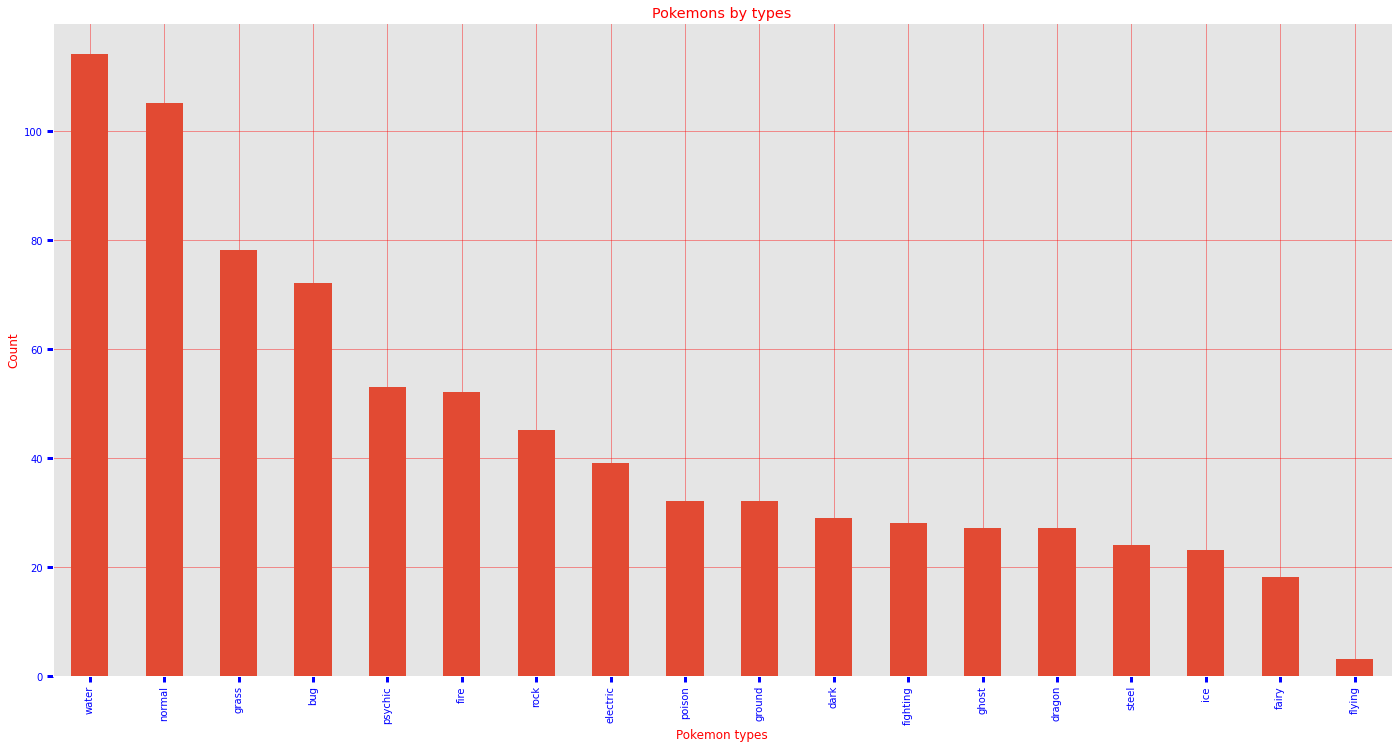

In [ ]:

# in Matplotlib

fig, ax = plt.subplots(figsize=(24, 12), sharey=True)


ax = data_sorted.plot.bar(x='fr', y= 'type', rot =90)

ax.tick_params(direction='out', length=6, width=3, colors='b',
               grid_color='r', grid_alpha=0.5, which='both')
ax.set_ylabel('Count', color='r')
ax.set_xlabel('Pokemon types', color='r')
ax.set_title('Pokemons by types', color='r')


plt.show()

In [ ]:

gens = data_set['generation'].unique()



array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
data_set[data_set['generation'] == 1]['is_legendary'].value_counts()

0    146
1      5
Name: is_legendary, dtype: int64

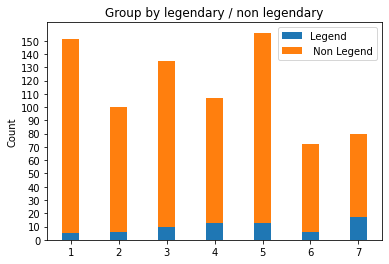

In [ ]:
legend_pok = []
non_legend_pok = []

for g in gens:
  pair =  data_set[data_set['generation'] == g]['is_legendary'].value_counts() 
  legend_pok.append(pair[1])
  non_legend_pok.append(pair[0])
 

legend_pok
non_legend_pok
gens

inx =  np.arange(len(gens))
width = 0.35  
p1 = plt.bar(inx, legend_pok, width)
p2 = plt.bar(inx, non_legend_pok, width,
             bottom=legend_pok)

plt.ylabel('Count')
plt.title('Group by legendary / non legendary')
plt.xticks(inx, gens)
plt.yticks(np.arange(0, 160, 10))
plt.legend((p1[0], p2[0]), ('Legend', ' Non Legend'))
plt.show()



In [ ]:


gens = data_set['generation'].unique()

gens




legendary_1 = data_set[data_set['generation'] == 1]['is_legendary'].value_counts()
legendary_2 = data_set[data_set['generation'] == 2]['is_legendary'].value_counts()
legendary_3 = data_set[data_set['generation'] == 3]['is_legendary'].value_counts()
legendary_4 = data_set[data_set['generation'] == 4]['is_legendary'].value_counts()
legendary_5 = data_set[data_set['generation'] == 5]['is_legendary'].value_counts()
legendary_6 = data_set[data_set['generation'] == 6]['is_legendary'].value_counts()
legendary_7 = data_set[data_set['generation'] == 7]['is_legendary'].value_counts()

legendary_1 

legendary_pok =  [legendary_1[1], legendary_2[1], legendary_3[1], legendary_4[1], legendary_5[1], legendary_6[1],legendary_7[1]]

non_legendary_pok = [legendary_1[0], legendary_2[0], legendary_3[0], legendary_4[0], legendary_5[0], legendary_6[0],legendary_7[0]]

legendary_1 [1]

inx =  np.arange(7)

width = 0.35  




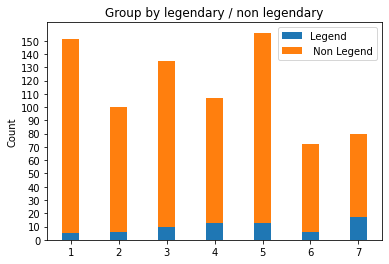

In [ ]:
p1 = plt.bar(inx, legendary_pok, width)
p2 = plt.bar(inx, non_legendary_pok, width,
             bottom=legendary_pok)

plt.ylabel('Count')
plt.title('Group by legendary / non legendary')
plt.xticks(inx, gens)
plt.yticks(np.arange(0, 160, 10))
plt.legend((p1[0], p2[0]), ('Legend', ' Non Legend'))
plt.show()

In [ ]:
legendary_7

0    63
1    17
Name: is_legendary, dtype: int64

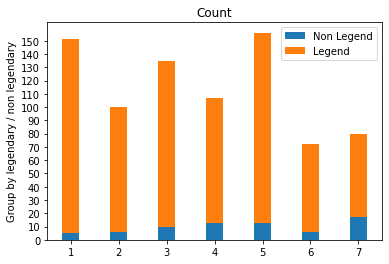

In [ ]:
data_set[data_set['generation'] == 2]

,Name,Type,generation,is_legendary,fr,gen_1_count
151,Chikorita,grass,2,0,78,731
152,Bayleef,grass,2,0,78,731
153,Meganium,grass,2,0,78,731
154,Cyndaquil,fire,2,0,52,731
155,Quilava,fire,2,0,52,731
...,...,...,...,...,...,...
246,Pupitar,rock,2,0,45,731
247,Tyranitar,rock,2,0,45,731
248,Lugia,psychic,2,1,53,70
249,Ho-Oh,fire,2,1,52,70


In [ ]:
gens = np.delete(year, 0)

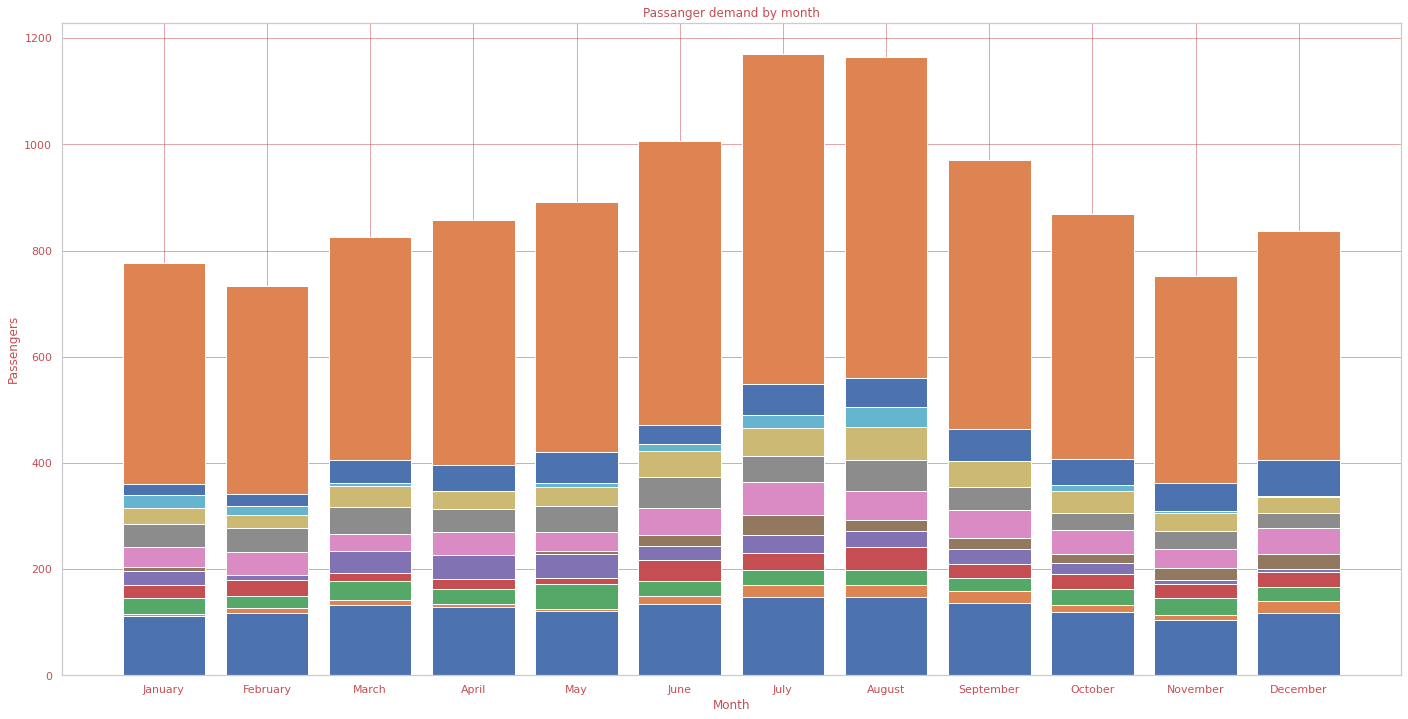

In [ ]:
# in Matplotlib


fig, ax = plt.subplots(figsize=(24, 12), sharey=True)
ax.bar(month, data_set[data_set['year'] == 1949]['passengers'])
for y in year:
  ax.bar(month, data_set[data_set['year'] == y]['passengers'], bottom = data_set[data_set['year'] == y-1]['passengers'])

ax.tick_params(direction='out', length=6, width=3, colors='r',
               grid_color='r', grid_alpha=0.5, which='both')
ax.set_ylabel('Passengers', color='r')
ax.set_xlabel('Month', color='r')
ax.set_title('Passanger demand by month', color='r')
plt.show()


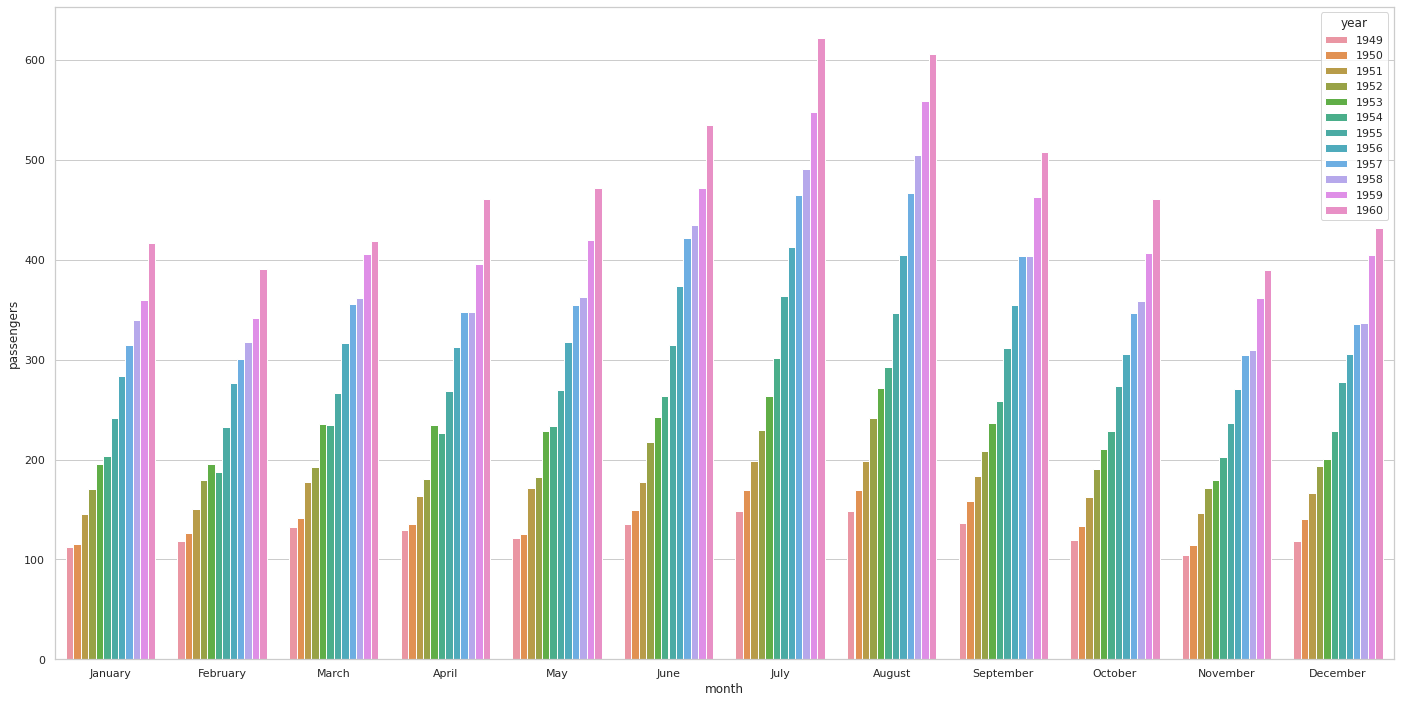

In [ ]:
# in seaborn
fig, ax = plt.subplots(figsize=(24, 12), sharey=True)
g = sns.barplot(x="month", y="passengers", hue="year",
                data=data_set);